In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.cluster import KMeans
from scipy.io import arff
from sklearn import cluster
from sklearn import metrics

In [2]:
path = '/content/2d-10c.arff'
databrut = arff.loadarff(open(path, 'r'))
datanp = np.array([[x[0],x[1]] for x in databrut[0]])
print(databrut)

(array([( 1.00007 , 40.9378, b'0'), ( 0.99736 , 41.1714, b'0'),
       ( 0.134799, 41.8113, b'0'), ..., (96.8852  , 68.1787, b'9'),
       (96.834   , 67.9841, b'9'), (98.4335  , 68.2043, b'9')],
      dtype=[('a0', '<f8'), ('a1', '<f8'), ('CLASS', 'S1')]), Dataset: 2d-10c
	a0's type is numeric
	a1's type is numeric
	CLASS's type is nominal, range is ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
)


In [3]:
print(datanp)

[[ 1.00007  40.9378  ]
 [ 0.99736  41.1714  ]
 [ 0.134799 41.8113  ]
 ...
 [96.8852   68.1787  ]
 [96.834    67.9841  ]
 [98.4335   68.2043  ]]


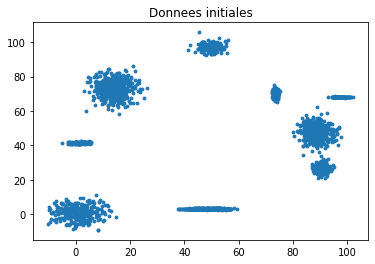

In [4]:
f0 = datanp[:,0] 
f1 = datanp[:,1] 
plt.scatter(f0, f1, s=8)
plt.title("Donnees initiales")
plt.show()

(array([[250., 371., 267.,   2., 656., 407.,   1., 142., 771., 123.],
        [166., 625.,  49., 291., 375., 253., 329., 326.,  20., 556.]]),
 array([-10.1495 ,   1.43645,  13.0224 ,  24.60835,  36.1943 ,  47.78025,
         59.3662 ,  70.95215,  82.5381 ,  94.12405, 105.71   ]),
 <a list of 2 Lists of Patches objects>)

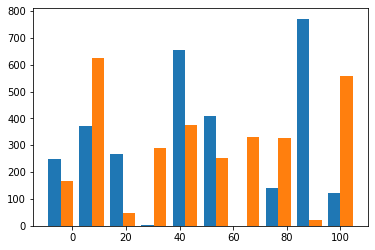

In [5]:
plt.hist(datanp)

In [6]:
model_k = KMeans(n_clusters=9, init='k-means++')
tps1=time.time()
model_k.fit(datanp)
tps2=time.time()
print(time.time())
labels_k_means = model_k.labels_
print("number of iterations is : ", model_k.n_iter_)

1639131170.2056918
number of iterations is :  2


In [7]:
print(labels_k_means)

[6 6 6 ... 8 8 8]


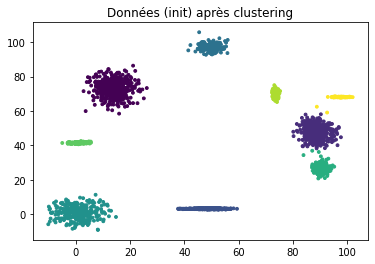

In [8]:
plt.scatter(f0, f1, c=labels_k_means, s=8)
plt.title("Données (init) après clustering")
plt.show()

In [9]:
sum_err = []
for i in range(1,20) :
  km=KMeans(n_clusters=i)
  km.fit(datanp)
  sum_err.append(km.inertia_)

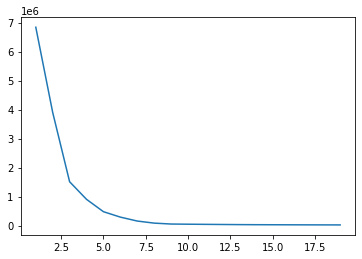

In [10]:
plt.plot(range(1,20),sum_err)
plt.show()

In [11]:
sum_err_2 = []
for i in range(2,20) :
  km=KMeans(n_clusters=i)
  km.fit(datanp)
  sum_err_2.append(metrics.silhouette_score(datanp, km.labels_, metric='euclidean'))

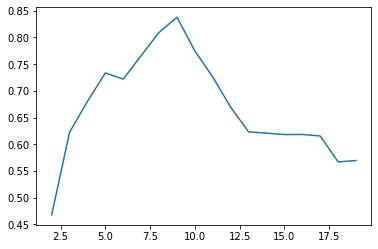

In [12]:
plt.plot(range(2,20),sum_err_2)
plt.show()


In [13]:
k=9
print("nb clusters =",k,", nb iter =",model_k.n_iter_, ", runtime = ", round((tps2 - tps1)*1000,2),"ms")

nb clusters = 9 , nb iter = 2 , runtime =  708.48 ms


In [14]:
#Il est evident que le nombre de clusters et de l'ordre de 9 (visuel), neanmoins, nous pouvons tester un nombre de clusters differents pour visualiser

In [15]:
model_k_2 = KMeans(n_clusters=4, init='k-means++')
model_k_2.fit(datanp)
print(time.time())
labels_k_means_2 = model_k_2.labels_
print("number of iterations is : ", model_k.n_iter_)

1639131184.529989
number of iterations is :  2


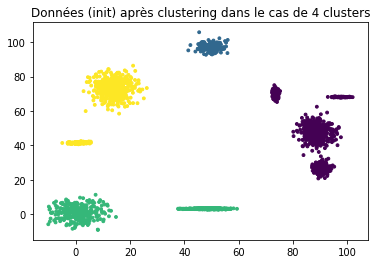

In [16]:
plt.scatter(f0, f1, c=labels_k_means_2, s=8)
plt.title("Données (init) après clustering dans le cas de 4 clusters")
plt.show()

In [17]:
path = '/content/cluto-t8-8k.arff'
databrut_2 = arff.loadarff(open(path, 'r'))
datanp_2 = np.array([[x[0],x[1]] for x in databrut_2[0]])
print(databrut_2)

(array([( 84.768997,  33.368999, b'1'), (569.791016,  55.458   , b'2'),
       (657.622986,  47.035   , b'4'), ...,
       ( 37.887001,  79.575996, b'1'), (175.552994,  76.314003, b'1'),
       (226.192001, 115.615997, b'0')],
      dtype=[('x', '<f8'), ('y', '<f8'), ('CLASS', 'S5')]), Dataset: cluto-t8-8k
	x's type is numeric
	y's type is numeric
	CLASS's type is nominal, range is ('0', '1', '2', '3', '4', '5', '6', '7', 'noise')
)


In [18]:
print(datanp_2)


[[ 84.768997  33.368999]
 [569.791016  55.458   ]
 [657.622986  47.035   ]
 ...
 [ 37.887001  79.575996]
 [175.552994  76.314003]
 [226.192001 115.615997]]


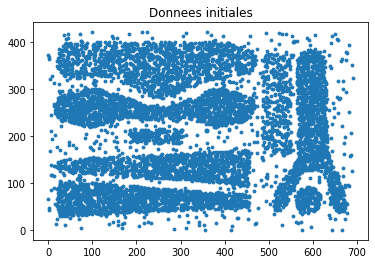

In [19]:
f0_ = datanp_2[:,0] 
f1_ = datanp_2[:,1] 
plt.scatter(f0_, f1_, s=8)
plt.title("Donnees initiales")
plt.show()

(array([[ 659.,  980.,  886.,  951.,  906.,  987.,  614.,  507., 1108.,
          402.],
        [1091., 1706., 1059., 1691., 1317., 1121.,   15.,    0.,    0.,
            0.]]),
 array([8.60000000e-02, 6.91237989e+01, 1.38161598e+02, 2.07199397e+02,
        2.76237196e+02, 3.45274994e+02, 4.14312793e+02, 4.83350592e+02,
        5.52388391e+02, 6.21426190e+02, 6.90463989e+02]),
 <a list of 2 Lists of Patches objects>)

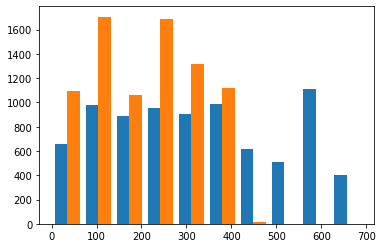

In [20]:
plt.hist(datanp_2)

In [21]:
model_k_dense = KMeans(n_clusters=9, init='k-means++')
tps1=time.time()
model_k_dense.fit(datanp_2)
tps2=time.time()
print(time.time())
labels_k_means_dense = model_k_dense.labels_
print("number of iterations is : ", model_k_dense.n_iter_)

1639131186.542746
number of iterations is :  17


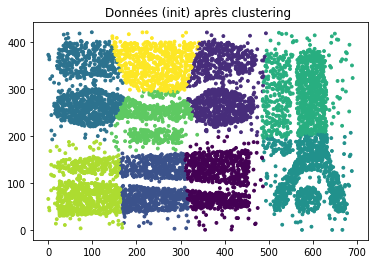

In [22]:
plt.scatter(f0_, f1_, c=labels_k_means_dense, s=8)
plt.title("Données (init) après clustering ")
plt.show()

In [23]:
path = '/content/3-spiral.arff'
databrut_spiral = arff.loadarff(open(path, 'r'))
datanp_spiral = np.array([[x[0],x[1]] for x in databrut_spiral[0]])
print(databrut_spiral)

(array([(31.95,  7.95, b'3'), (31.15,  7.3 , b'3'), (30.45,  6.65, b'3'),
       (29.7 ,  6.  , b'3'), (28.9 ,  5.55, b'3'), (28.05,  5.  , b'3'),
       (27.2 ,  4.55, b'3'), (26.35,  4.15, b'3'), (25.4 ,  3.85, b'3'),
       (24.6 ,  3.6 , b'3'), (23.6 ,  3.3 , b'3'), (22.75,  3.15, b'3'),
       (21.85,  3.05, b'3'), (20.9 ,  3.  , b'3'), (20.  ,  2.9 , b'3'),
       (19.1 ,  3.  , b'3'), (18.2 ,  3.2 , b'3'), (17.3 ,  3.25, b'3'),
       (16.55,  3.5 , b'3'), (15.7 ,  3.7 , b'3'), (14.85,  4.1 , b'3'),
       (14.15,  4.4 , b'3'), (13.4 ,  4.75, b'3'), (12.7 ,  5.2 , b'3'),
       (12.05,  5.65, b'3'), (11.45,  6.15, b'3'), (10.9 ,  6.65, b'3'),
       (10.3 ,  7.25, b'3'), ( 9.7 ,  7.85, b'3'), ( 9.35,  8.35, b'3'),
       ( 8.9 ,  9.05, b'3'), ( 8.55,  9.65, b'3'), ( 8.15, 10.35, b'3'),
       ( 7.95, 10.95, b'3'), ( 7.75, 11.7 , b'3'), ( 7.55, 12.35, b'3'),
       ( 7.45, 13.  , b'3'), ( 7.35, 13.75, b'3'), ( 7.3 , 14.35, b'3'),
       ( 7.35, 14.95, b'3'), ( 7.35, 15.75, b'3'),

In [24]:
print(datanp_spiral)

[[31.95  7.95]
 [31.15  7.3 ]
 [30.45  6.65]
 [29.7   6.  ]
 [28.9   5.55]
 [28.05  5.  ]
 [27.2   4.55]
 [26.35  4.15]
 [25.4   3.85]
 [24.6   3.6 ]
 [23.6   3.3 ]
 [22.75  3.15]
 [21.85  3.05]
 [20.9   3.  ]
 [20.    2.9 ]
 [19.1   3.  ]
 [18.2   3.2 ]
 [17.3   3.25]
 [16.55  3.5 ]
 [15.7   3.7 ]
 [14.85  4.1 ]
 [14.15  4.4 ]
 [13.4   4.75]
 [12.7   5.2 ]
 [12.05  5.65]
 [11.45  6.15]
 [10.9   6.65]
 [10.3   7.25]
 [ 9.7   7.85]
 [ 9.35  8.35]
 [ 8.9   9.05]
 [ 8.55  9.65]
 [ 8.15 10.35]
 [ 7.95 10.95]
 [ 7.75 11.7 ]
 [ 7.55 12.35]
 [ 7.45 13.  ]
 [ 7.35 13.75]
 [ 7.3  14.35]
 [ 7.35 14.95]
 [ 7.35 15.75]
 [ 7.55 16.35]
 [ 7.7  16.95]
 [ 7.8  17.55]
 [ 8.05 18.15]
 [ 8.3  18.75]
 [ 8.65 19.3 ]
 [ 8.9  19.85]
 [ 9.3  20.3 ]
 [ 9.65 20.8 ]
 [10.2  21.25]
 [10.6  21.65]
 [11.1  22.15]
 [11.55 22.45]
 [11.95 22.7 ]
 [12.55 23.  ]
 [13.05 23.2 ]
 [13.45 23.4 ]
 [14.   23.55]
 [14.55 23.6 ]
 [15.1  23.75]
 [15.7  23.75]
 [16.15 23.85]
 [16.7  23.8 ]
 [17.15 23.75]
 [17.75 23.75]
 [18.2  23

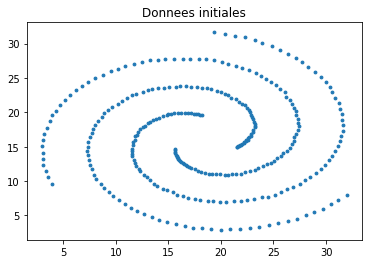

In [25]:
f0__ = datanp_spiral[:,0] 
f1__ = datanp_spiral[:,1] 
plt.scatter(f0__, f1__, s=8)
plt.title("Donnees initiales")
plt.show()

(array([[16., 20., 22., 38., 47., 31., 59., 25., 31., 23.],
        [21., 28., 34., 48., 42., 50., 31., 28., 22.,  8.]]),
 array([ 2.9  ,  5.805,  8.71 , 11.615, 14.52 , 17.425, 20.33 , 23.235,
        26.14 , 29.045, 31.95 ]),
 <a list of 2 Lists of Patches objects>)

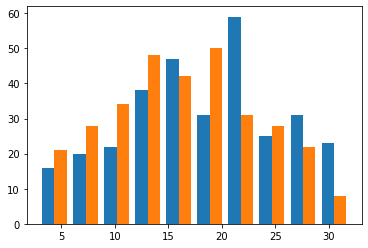

In [26]:
plt.hist(datanp_spiral)

In [27]:
model_k_spiral = KMeans(n_clusters=3, init='k-means++')
tps1=time.time()
model_k_spiral.fit(datanp_spiral)
tps2=time.time()
print(time.time())
labels_k_means_3 = model_k_spiral.labels_
print("number of iterations is : ", model_k_spiral.n_iter_)

1639131187.4536688
number of iterations is :  4


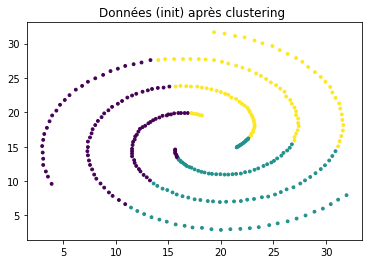

In [28]:
plt.scatter(f0__, f1__, c=labels_k_means_3, s=8)
plt.title("Données (init) après clustering ")
plt.show()

In [29]:
#3D

In [30]:
path = '/content/hepta.arff'
databrut = arff.loadarff(open(path, 'r'))
datanp = np.array([[x[0],x[1],x[2]] for x in databrut[0]])
print(databrut)

(array([(-6.327400e-02,  2.773400e-02,  2.268300e-02, b'1'),
       (-7.310000e-04,  4.821100e-02,  6.919800e-02, b'1'),
       (-6.076700e-02, -9.080000e-03,  5.308500e-02, b'1'),
       ( 1.325200e-02, -1.187600e-02,  5.532400e-02, b'1'),
       (-5.450800e-02, -3.813000e-03,  1.738000e-03, b'1'),
       ( 2.418000e-02,  6.827500e-02,  3.346200e-02, b'1'),
       (-2.930800e-02,  5.984900e-02, -6.326000e-02, b'1'),
       (-1.645300e-02,  1.388100e-02, -1.323600e-02, b'1'),
       (-4.236100e-02, -5.994200e-02, -2.648700e-02, b'1'),
       (-1.631000e-02, -3.661200e-02,  4.792800e-02, b'1'),
       ( 3.536000e-02, -4.495000e-02,  4.147400e-02, b'1'),
       (-2.870000e-04, -4.949600e-02, -6.343000e-02, b'1'),
       (-6.593100e-02, -5.381000e-03, -6.489900e-02, b'1'),
       ( 9.049000e-03,  2.797600e-02,  1.198000e-02, b'1'),
       (-5.335000e-03,  6.259200e-02, -5.750700e-02, b'1'),
       (-4.175000e-03,  6.464600e-02,  4.085600e-02, b'1'),
       ( 9.102400e-02, -3.144600e-02, -

In [31]:
print(datanp)

[[-6.327400e-02  2.773400e-02  2.268300e-02]
 [-7.310000e-04  4.821100e-02  6.919800e-02]
 [-6.076700e-02 -9.080000e-03  5.308500e-02]
 [ 1.325200e-02 -1.187600e-02  5.532400e-02]
 [-5.450800e-02 -3.813000e-03  1.738000e-03]
 [ 2.418000e-02  6.827500e-02  3.346200e-02]
 [-2.930800e-02  5.984900e-02 -6.326000e-02]
 [-1.645300e-02  1.388100e-02 -1.323600e-02]
 [-4.236100e-02 -5.994200e-02 -2.648700e-02]
 [-1.631000e-02 -3.661200e-02  4.792800e-02]
 [ 3.536000e-02 -4.495000e-02  4.147400e-02]
 [-2.870000e-04 -4.949600e-02 -6.343000e-02]
 [-6.593100e-02 -5.381000e-03 -6.489900e-02]
 [ 9.049000e-03  2.797600e-02  1.198000e-02]
 [-5.335000e-03  6.259200e-02 -5.750700e-02]
 [-4.175000e-03  6.464600e-02  4.085600e-02]
 [ 9.102400e-02 -3.144600e-02 -1.477400e-02]
 [-7.706800e-02 -3.532400e-02 -3.906000e-02]
 [ 5.515000e-02 -7.045000e-03  7.849500e-02]
 [-3.377900e-02  4.906600e-02  2.695800e-02]
 [ 4.495400e-02 -3.371600e-02  1.189400e-02]
 [ 8.785000e-03  1.689500e-02 -9.079000e-02]
 [-6.16550

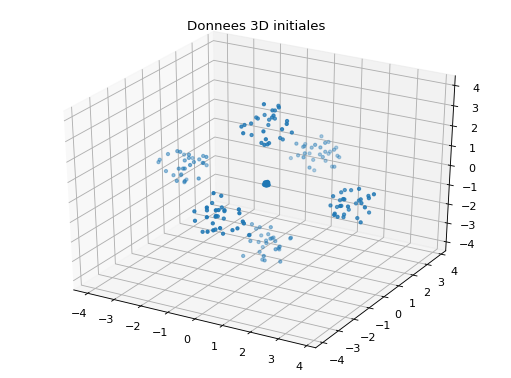

In [32]:
f0 = datanp[:,0] 
f1 = datanp[:,1]
f2 = datanp[:,2]
fig = plt.figure(figsize=(8,6), dpi=80)
ax = fig.add_subplot(projection='3d')
ax.scatter(f0,f1,f2, s=8)
plt.title("Donnees 3D initiales")
plt.show()

(array([[10., 18.,  2.,  0., 66., 81.,  5.,  0., 19., 11.],
        [ 8., 16.,  6.,  4., 58., 81.,  9.,  2., 15., 13.],
        [ 8., 21.,  1.,  5., 57., 86.,  4.,  5., 17.,  8.]]),
 array([-3.970394 , -3.1834157, -2.3964374, -1.6094591, -0.8224808,
        -0.0355025,  0.7514758,  1.5384541,  2.3254324,  3.1124107,
         3.899389 ]),
 <a list of 3 Lists of Patches objects>)

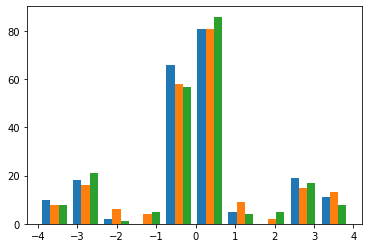

In [33]:
plt.hist(datanp)

In [34]:
model_k = KMeans(n_clusters=7, init='k-means++')
tps1=time.time()
model_k.fit(datanp)
tps2=time.time()
print(time.time())
labels_k_means = model_k.labels_
print("number of iterations is : ", model_k.n_iter_)

1639131188.530785
number of iterations is :  2


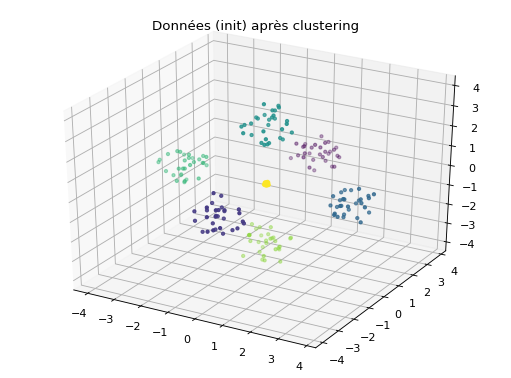

In [35]:
fig2 = plt.figure(figsize=(8,6), dpi=80)
ax2 = fig2.add_subplot(projection='3d')
ax2.scatter(f0, f1,f2, c=labels_k_means, s=8)
plt.title("Données (init) après clustering")
plt.show()

In [36]:
inert = model_k.inertia_
silh = metrics.silhouette_score(datanp, model_k.labels_, metric='euclidean')
print("Inertie : ", inert)
print("Coefficient de silhouette : ", silh)

Inertie :  106.14764659310868
Coefficient de silhouette :  0.7019231989948802


In [37]:
sum_err = []
for i in range(1,10) :
  km=KMeans(n_clusters=i)
  km.fit(datanp)
  sum_err.append(km.inertia_)

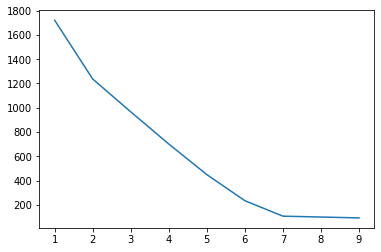

In [38]:
plt.plot(range(1,10),sum_err)
plt.show()

In [39]:
sum_err_2 = []
for i in range(2,10) :
  km=KMeans(n_clusters=i)
  km.fit(datanp)
  sum_err_2.append(metrics.silhouette_score(datanp, km.labels_, metric='euclidean'))

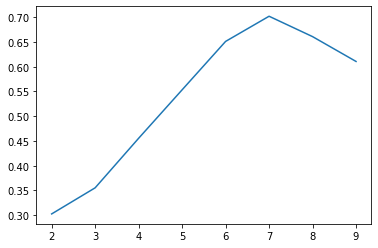

In [40]:
plt.plot(range(2,10),sum_err_2)
plt.show()